In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv("patient_risk_data_300k.csv")


In [8]:
df.shape


(286700, 14)

In [3]:
df.head()

,PatientID,Age,Gender,Smoking,AlcoholConsumption,PhysicalActivity,BMI,ChronicDiseases,Medications,FamilyHistory,RiskLevel,LastCheckupDate,RiskScore,Alerts
0,P000001,32,Male,No,Low,Low,21.1,NaN,0.0,Cancer,Medium,2024-07-03,0.74,🟡
1,P000002,29,Female,Yes,NaN,NaN,22.8,HeartDisease,1.0,Stroke,Low,2024-05-11,0.20,🟢
2,P000003,87,Female,Yes,High,Moderate,35.8,NaN,0.0,Arthritis,High,2024-04-16,0.81,🔴
3,P000004,72,Female,No,Low,Low,39.1,Diabetes,1.0,NaN,Low,2024-10-07,0.38,🟢
4,P000005,62,Female,Yes,High,NaN,39.4,Obesity,1.0,Stroke,Low,2024-05-22,0.29,🟢


In [5]:
df.isnull().sum()

,0
PatientID,0
Age,0
Gender,0
Smoking,1
AlcoholConsumption,72512
PhysicalActivity,71828
BMI,1
ChronicDiseases,47527
Medications,1
FamilyHistory,41212


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286700 entries, 0 to 286699
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   PatientID           286700 non-null  object 
 1   Age                 286700 non-null  int64  
 2   Gender              286700 non-null  object 
 3   Smoking             286699 non-null  object 
 4   AlcoholConsumption  214188 non-null  object 
 5   PhysicalActivity    214872 non-null  object 
 6   BMI                 286699 non-null  float64
 7   ChronicDiseases     239173 non-null  object 
 8   Medications         286699 non-null  float64
 9   FamilyHistory       245488 non-null  object 
 10  RiskLevel           286699 non-null  object 
 11  LastCheckupDate     286699 non-null  object 
 12  RiskScore           286699 non-null  float64
 13  Alerts              286699 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 30.6+ MB


In [7]:
df.describe()

,Age,BMI,Medications,RiskScore
count,286700.000000,286699.000000,286699.00000,286699.000000
mean,53.997953,28.993872,2.08194,0.499534
std,21.094018,6.347691,1.37983,0.288948
min,18.000000,18.000000,0.00000,0.000000
25%,36.000000,23.500000,1.00000,0.250000
50%,54.000000,29.000000,2.00000,0.500000
75%,72.000000,34.500000,3.00000,0.750000
max,90.000000,40.000000,4.00000,1.000000


In [10]:
df = df[["RiskScore", "RiskLevel"]]

In [11]:
label_encoder = LabelEncoder()
df["RiskLevel"] = label_encoder.fit_transform(df["RiskLevel"])

In [12]:
X = df[["RiskScore"]]
y = df["RiskLevel"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
y_pred = rf_model.predict(X_test)

In [17]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

1.0


In [18]:

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(f"\n✅ Accuracy: {accuracy * 100:.2f}%")


Confusion Matrix:
[[11761     0     0]
 [    0 22787     0]
 [    0     0 22792]]

✅ Accuracy: 100.00%


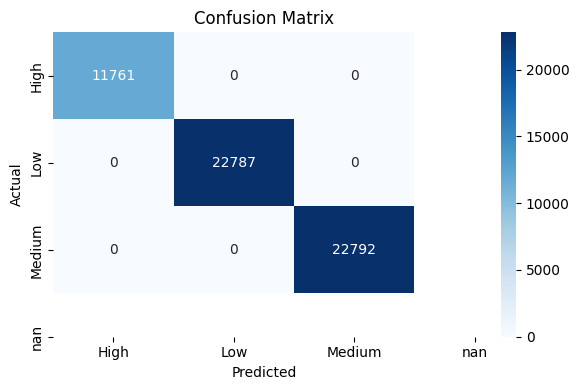

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# 8. Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
class_names = label_encoder.classes_

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()